In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from livelossplot import PlotLossesKeras
%tensorflow_version 1.x

Using TensorFlow backend.


In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

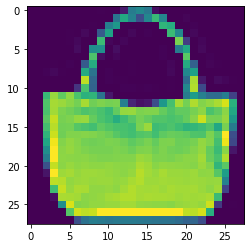

In [5]:
plt.imshow(training_images[100])
plt.show()

In [0]:
training_images = training_images/255
test_images = test_images/255

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                          tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("acc")>0.85):
      print("target loss reached so stopping training")
      self.model.stop_training = True

In [0]:
callbacks = mycallback()

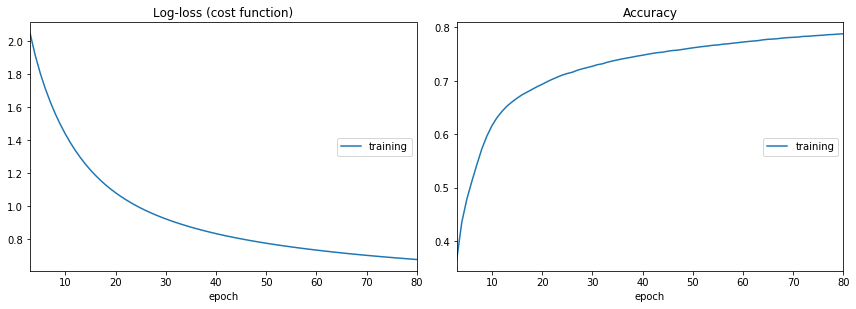

Log-loss (cost function):
training   (min:    0.675, max:    2.446, cur:    0.675)

Accuracy:
training   (min:    0.115, max:    0.788, cur:    0.788)


In [11]:
model.fit(training_images,training_labels,epochs=80,callbacks=[callbacks,PlotLossesKeras()],verbose=0)

In [12]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.6910 - acc: 0.7760


[0.6910215223312378, 0.776]